# Laboratorio de Cómputo de Soluciones Aproximadas de EDPs Hiperbólicas por Sumas Parciales de Fourier

Con el procedimiento presentado en este cuaderno se resuelven problemas de la forma:
$$
u_{tt} - c^2u_{xx}=0,\\
u(0,t)=u(L,t)=0,\\
u(x,0)=f(x), u_t(x,0) =0.
$$

Utilizando sumas parciales de Fourier correspondientes al operador:
$$
\mathcal{F}_N(u)(x,t):=\sum_{n=1}^N A_n(u)\cos\left(\frac{cn\pi t}{L}\right)\mathrm{sen}\left(\frac{n\pi x}{L}\right)
$$
donde
$$
A_n(u):=\frac{2}{L}\int_{0}^L u(x,0)\mathrm{sen}\left(\frac{n\pi x}{L}\right)dx
$$
para cada $1\leq n\leq N$.

Las librerías de Python necesarias para estos cálculos son las siguientes:

In [ ]:
from scipy.integrate import quad
from numpy import sin,cos, pi, zeros,linspace, arange, meshgrid
from matplotlib.cm import Blues
from matplotlib.pyplot import style, subplots, show, xlabel, ylabel, plot

## Ejemplo de cálculo de solución aproximada

Consideremos el problema de calcular la solución aproximada $u_N(x,t):=\mathcal{F}_N(u)(x,t)$ para el problema:
$$
u_{tt} - 2u_{xx}=0,\\
u(0,t)=u(3,t)=0,\\
u(x,0)=(H(x-1)-H(x-2))(1-|2x-3|), u_t(x,0) =0.
$$
para
$$
H(x)=\left\{
\begin{array}{ll}
1, & x\geq 0\\
0, & x<0
\end{array}
  \right. .
$$

Es posible observar que para este problema $L=3$. Si consideramos $N=10$, es posible incializar estos parámetros utilizando los siguientes comandos.

In [ ]:
L = 3
N = 10

Ahora podemos definir $H(x)$ y la función correspondiente a la condición inicial:

In [ ]:
def H(x):
  return x>=0
def f(x):
  return (H(x-1)-H(x-2))*(1-abs(2*x-3))

Calculamos ahora los coeficientes $A_n(u)$ para $1\leq n\leq 10$.

In [ ]:
A = zeros(N)
for k in range(N):
  def fs(x):
    return f(x)*sin((k+1)*pi*x/L)
  A[k] = quad(fs,0,L)[0]*2/L

Definimos el oprador de representación aproximada de Fourier
$$
\mathcal{S}_N(u,A)(x,t):=\sum_{n=1}^N A_n(u)\cos\left(\frac{cn\pi t}{L}\right)\mathrm{sen}\left(\frac{n\pi x}{L}\right)
$$
utilizando la siguiente secuencia de comandos.

In [ ]:
def S_N(x,t,c,A):
  N = len(A)
  y = 0
  for k in range(N):
    y = y + A[k]*sin((k+1)*pi*x/L)*cos(c*(pi*(k+1)*t)/L)
  return y

Definimos ahora un conjunto de nodos en $\hat{X}_L\subset [0,3]$.

Graficamos $\hat{u}_{10}(x,0):=\mathcal{F}_{10}(u)(x,0)$.

Text(0, 0.5, '$u_N(x,0)$')

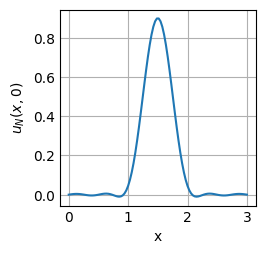

In [ ]:
x = linspace(0,3,100)
plot(x,S_N(x,0,1,A))
xlabel('x')
ylabel('$u_N(x,0)$')

Ahora graficamos $\hat{u}_{10}(x,t):=\mathcal{F}_{10}(u)(x,t)$ en $[0,3]\times [0,6]$.

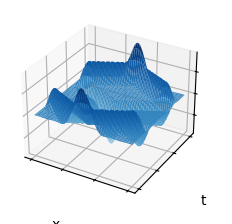

In [ ]:
style.use('_mpl-gallery')

X = arange(0, 3, 1/100)
T = arange(0, 6, 1/100)
X, T = meshgrid(X, T)
Z = S_N(X,T,1,A)

fig, ax = subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, T, Z, vmin=Z.min() * 2, cmap=Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

xlabel('x')
ylabel('t')

show()